# plots: n-widths for transport problems 

if there is an error saying:
<div class="alert alert-danger">findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.</div>

[you need to delete matplotlib's cache!](https://github.com/matplotlib/matplotlib/issues/13139/)

```python
import matplotlib as mpl
mpl.get_cachedir()
```
and if that does not help,

[try this](https://stackoverflow.com/questions/42097053/matplotlib-cannot-find-basic-fonts/71356144#71356144)

or:

copy https://www.fontsquirrel.com/fonts/computer-modern into C:\Users\florianma\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf

In [1]:
import matplotlib as mpl

print(mpl.get_cachedir())
#mpl.font_manager._rebuild()
#print(mpl.font_manager.get_cachedir())

C:\Users\florianma\.matplotlib


In [2]:
import numpy as np
from scipy.linalg import svd, orth, qr
from scipy.optimize import curve_fit
from numpy import sin, cos, pi
import matplotlib.pyplot as plt
import matplotlib as mpl
cmap = plt.cm.plasma
page_width_pt = 455.24
pt2in = 0.01389
pt2cm = 0.0352777778
cm2in = 1/2.54
plot_width_in = page_width_pt*pt2in/2
print(plot_width_in/cm2in)

plt.rcParams["figure.figsize"] = (plot_width_in, plot_width_in/1.61803398875)
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
mpl.rc('text', usetex=True)
plt.rcParams['text.usetex'] = True
mpl.rc('font', family='serif', size=12, serif='Computer Modern Roman')

8.030570172000001


In [3]:
results_path = "C:/Users/florianma/Dropbox/Kol-N-width-Oslo-Ulm/n_widths_for_transport/results/"

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


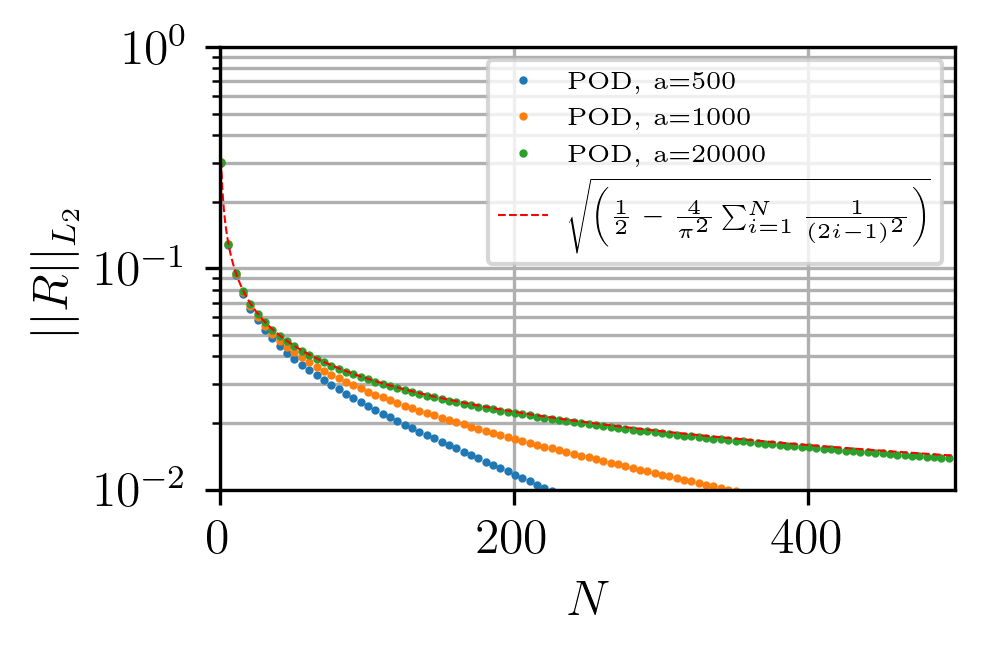

In [4]:
fig, ax = plt.subplots()
i = np.arange(1, 501)
for a in (500, 1000, 20000):
    delta_n = np.load(results_path+"_delta_n_trigonometric_heaviside"+str(a)+".npy")
    ax.plot(i-1, delta_n, marker=".", ls="None", label="POD, a={:.0f}".format(a), ms=2)
estimate1 = (2 / (i * np.pi**2))**.5
estimate2 = (1/2 - 4/np.pi**2 * np.cumsum(1/(2*i - 1)**2)) **.5

lbl1 = r'$\sqrt {\left( \frac{2}{N \pi^2} \right)}$'
lbl2 =  r'$\sqrt {\left( \frac{1}{2} - \frac{4}{\pi^2} \sum_{i=1}^N  \frac{1}{(2i-1)^2 } \right)}$'


#ax.plot(i, estimate1, "k--", label=lbl1, lw=.5)
ax.plot(i, estimate2, "r--", label=lbl2, lw=.5)
ax.set_yscale('log')
plt.legend(prop={'size': 6})
plt.ylim([1e-2, 1])
plt.xlim([0, 500])
plt.xlabel(r'$N$')
plt.ylabel(r'$|| R ||_{L_2}$')
plt.grid(which="both")
plt.show()

In [5]:
delta_n = {}
d_n = {}
rmse = {}
maxe = {}
SVs = {}
for j, bv_name in enumerate(["svd", "trigonometric", "greedy", "local neighbours average", "local pulse functions"]):
    print(bv_name)
    delta_n[bv_name] = {}
    d_n[bv_name] = {}
    rmse[bv_name] = {}
    maxe[bv_name] = {}
    for i, ic_name in enumerate(["heaviside", "linear ramp", "smooth ramp", "smooth ramp, C^1", "smooth ramp, C^2", "smooth ramp, C^3", "smooth ramp, C^4", "smooth ramp, C^5", "sigmoid"]):
        delta_n[bv_name][ic_name] = np.load(results_path+"_delta_n_"+bv_name+"_"+ic_name+".npy")
        d_n[bv_name][ic_name] = np.load(results_path+"_d_n_"+bv_name+"_"+ic_name+".npy")
        rmse[bv_name][ic_name] = np.load(results_path+"rmse_"+bv_name+"_"+ic_name+".npy")
        maxe[bv_name][ic_name] = np.load(results_path+"maxe_"+bv_name+"_"+ic_name+".npy")
#for ic_name in ["smooth ramp, C^0", "smooth ramp, C^1", "smooth ramp, C^2", "smooth ramp, C^3", "sigmoid", "heaviside"]:
        SVs[ic_name] = np.load(results_path+"SV_"+ic_name+".npy")
x = np.load(results_path+"x.npy")

svd
trigonometric
greedy
local neighbours average
local pulse functions


In [6]:
from scipy.optimize import curve_fit

def func(x, a):
    if a <= 0:
        return np.nan
    return np.log10(a/x**p)

def func2(x, a, p):
    if a <= 0:
        return np.nan
    return np.log10(a/x**p)

xdata = np.arange(51, 1501, dtype=np.float64)
# singular values fit
fig, ax = plt.subplots()
for i, ic_name in enumerate(["heaviside", "linear ramp", "smooth ramp, C^1", "smooth ramp, C^2",
                             "smooth ramp, C^3", "smooth ramp, C^4", "smooth ramp, C^5"]):
    n = np.arange(0, 500, dtype=np.float64)
    r = delta_n[bv_name][ic_name]
    L2_error_log = np.log10(r)
    ll = np.isfinite(L2_error_log)
    
    n = n[ll][10:]
    L2_error_log = L2_error_log[ll][10:]
    p = i +.5
    print(p)
    popt, pcov = curve_fit(func, n, L2_error_log, [.45])
    c = popt[0]
    print("e(n) = {:.6f} /n** {:.2f} ".format(popt[0], p), ic_name)
    
    ax.plot(n, 10**L2_error_log, "o", ms=1, color=cmap(i/7), label=ic_name)
    ax.plot(n, 10**func(n, *popt), 'g--')

ax.set_yscale('log')
plt.legend(prop={'size': 6})
plt.ylim([1e-12, 1])
plt.xlim([0, 500])
plt.xlabel(r'$N$')
plt.ylabel(r'$|| R ||_{L_2}$')
plt.grid(which="both")

plt.show()





<ipython-input-6-9efdec490d34>:20: RuntimeWarning: divide by zero encountered in log10
  L2_error_log = np.log10(r)
<ipython-input-6-9efdec490d34>:20: RuntimeWarning: divide by zero encountered in log10
  L2_error_log = np.log10(r)
<ipython-input-6-9efdec490d34>:20: RuntimeWarning: divide by zero encountered in log10
  L2_error_log = np.log10(r)
<ipython-input-6-9efdec490d34>:20: RuntimeWarning: divide by zero encountered in log10
  L2_error_log = np.log10(r)
<ipython-input-6-9efdec490d34>:20: RuntimeWarning: divide by zero encountered in log10
  L2_error_log = np.log10(r)
<ipython-input-6-9efdec490d34>:20: RuntimeWarning: divide by zero encountered in log10
  L2_error_log = np.log10(r)
<ipython-input-6-9efdec490d34>:20: RuntimeWarning: divide by zero encountered in log10
  L2_error_log = np.log10(r)


0.5
e(n) = 0.376235 /n** 0.50  heaviside
1.5
e(n) = 88.783293 /n** 1.50  linear ramp
2.5
e(n) = 20963.718072 /n** 2.50  smooth ramp, C^1
3.5
e(n) = 4942516.430525 /n** 3.50  smooth ramp, C^2
4.5
e(n) = 1162750865.616400 /n** 4.50  smooth ramp, C^3
5.5
e(n) = 275018144860.562317 /n** 5.50  smooth ramp, C^4
6.5
e(n) = 64682772971044.187500 /n** 6.50  smooth ramp, C^5


RuntimeError: latex was not able to process the following string:
b'smooth ramp, C^1'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.24 (MiKTeX 22.7) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(C:/Users/florianma/.matplotlib/tex.cache/8b4809965410459c1893dbc353e043c6.tex
LaTeX2e <2022-06-01> patch level 5
L3 programming layer <2022-07-04>
(C:\Users\florianma\AppData\Local\Programs\MiKTeX\tex/latex/base\article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(C:\Users\florianma\AppData\Local\Programs\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\florianma\AppData\Local\Programs\MiKTeX\tex/latex/type1cm\type1cm.sty
)
(C:\Users\florianma\AppData\Local\Programs\MiKTeX\tex/latex/cm-super\type1ec.st
y (C:\Users\florianma\AppData\Local\Programs\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Users\florianma\AppData\Local\Programs\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\florianma\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.s
ty
(C:\Users\florianma\AppData\Local\Programs\MiKTeX\tex/latex/graphics\keyval.sty
)
(C:\Users\florianma\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Users\florianma\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))

(C:\Users\florianma\AppData\Local\Programs\MiKTeX\tex/latex/geometry\geometry.c
fg)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (C:\Users\florianma\AppData\Local\Programs\MiKTeX\tex/latex/base\textcomp.sty
)
(C:\Users\florianma\AppData\Local\Programs\MiKTeX\tex/latex/l3backend\l3backend
-dvips.def)
No file 8b4809965410459c1893dbc353e043c6.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.19 {\rmfamily smooth ramp, C^
                               1}
No pages of output.
Transcript written on 8b4809965410459c1893dbc353e043c6.log.
latex: major issue: Bis jetzt haben Sie noch nicht nach MiKTeX-Updates gesucht.




<Figure size 948.493x586.201 with 1 Axes>

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


svd heaviside
svd linear ramp
svd smooth ramp, C^1
svd smooth ramp, C^2
svd smooth ramp, C^3
svd smooth ramp, C^4
svd smooth ramp, C^5
svd sigmoid


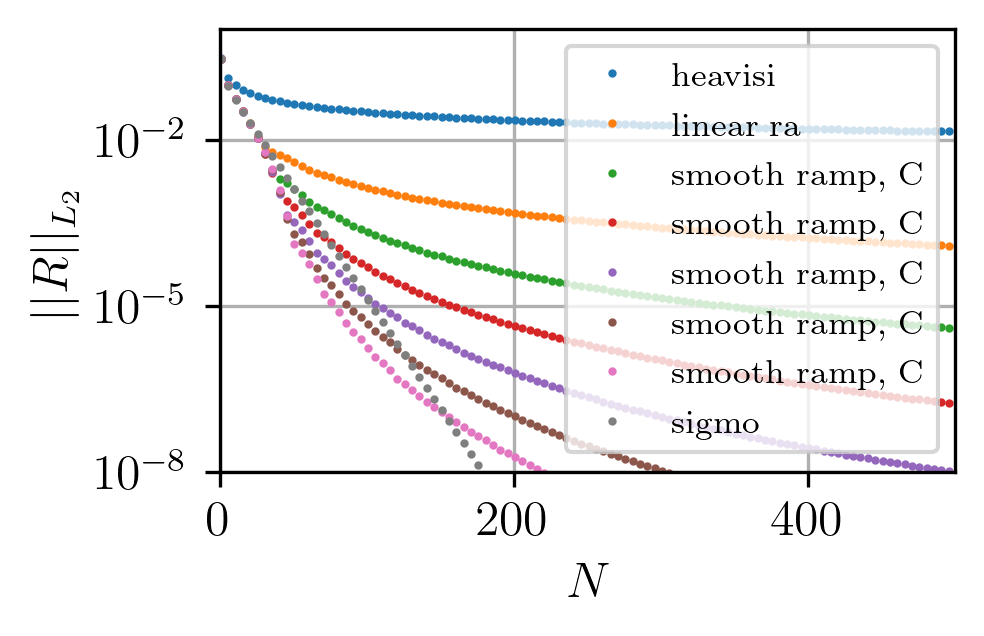

In [7]:
bv_name = "svd"
i = np.arange(1, 501)
fig, ax = plt.subplots()

for j, ic_name in enumerate(["heaviside", "linear ramp", "smooth ramp, C^1", "smooth ramp, C^2", "smooth ramp, C^3", "smooth ramp, C^4", "smooth ramp, C^5", "sigmoid"]):
    err = delta_n[bv_name][ic_name]
    print(bv_name, ic_name)#, err[err!=0])
    ax.plot(i-1, err, ".", ms=2, label=ic_name[:-2])
plt.legend(prop={'size': 8})
ax.set_yscale('log')
plt.ylim([1e-8, 1])
plt.xlim([0, 500])
plt.xlabel(r'$N$')
plt.ylabel(r'$|| R ||_{L_2}$')
plt.grid(which="both")


In [8]:
def plot(rmse, estimate):
    l = rmse != 0
    rmse /= rmse[l][0]
    fig, ax = plt.subplots()
    ax.plot(rmse, "k.", ms=2)
    #ax.plot(estimate, "r--")
    ax.set_yscale('log')
#    plt.legend(prop={'size': 8})
    plt.ylim([1e-8, 1])
    plt.xlim([0, 500])
    plt.xlabel("order")
    plt.ylabel("singular value")
    plt.grid(which="both")
    return ax

def plot2(rmse, estimate):
    l = rmse != 0
    rmse /= rmse[l][0]
    fig, ax = plt.subplots()
    ax.plot(1/ rmse, "k.", ms=2)
    ax.plot(1/ estimate, "r--")
    #ax.set_yscale('log')
#    plt.legend(prop={'size': 8})
    #plt.ylim([1e-12, 1])
    plt.xlim([0, 500])
    plt.xlabel("order")
    plt.ylabel("1/RMSE")
    return ax

In [9]:
n = np.arange(500)

<ipython-input-10-922e4fcff037>:6: RuntimeWarning: divide by zero encountered in true_divide
  estimate = .5/n


(0.0, 1000.0)

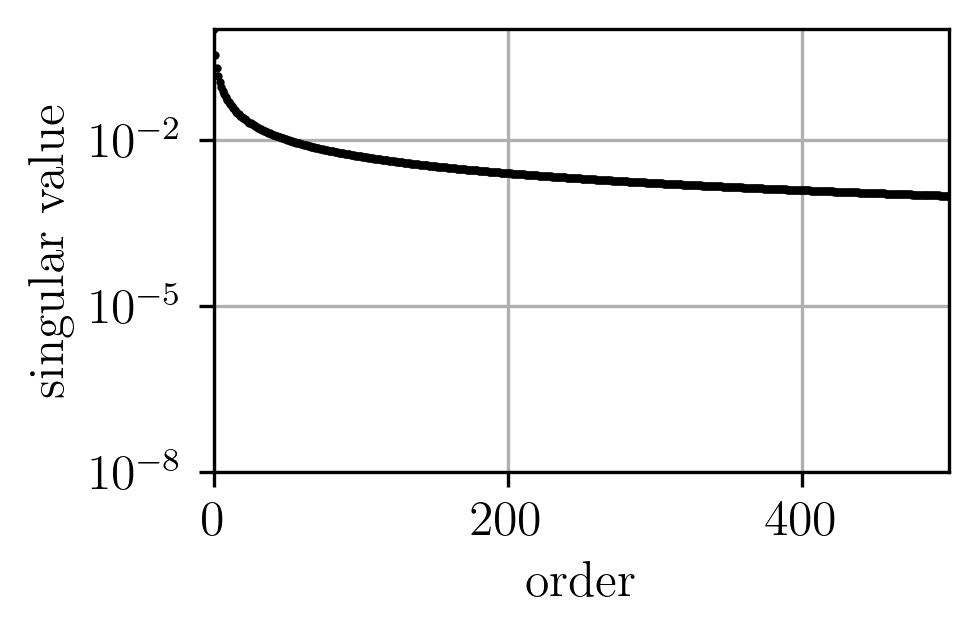

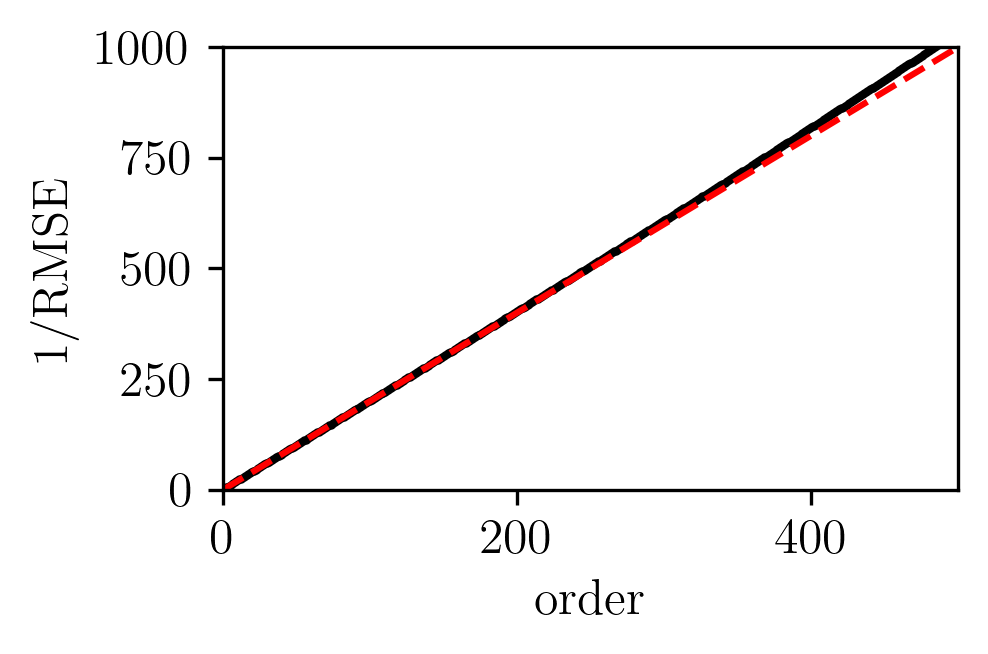

In [10]:
bv_name = "svd"
ic_name = "heaviside"
err = rmse[bv_name][ic_name]
#err = err[err!=0.0]
S = SVs[ic_name].copy()
estimate = .5/n
plot(S, estimate)
ax = plot2(S, estimate)
ax.set_ylim([0, 1e3])

<ipython-input-11-a69b594a1d9a>:6: RuntimeWarning: divide by zero encountered in true_divide
  estimate1 = (2 / (n * np.pi**2))**.5


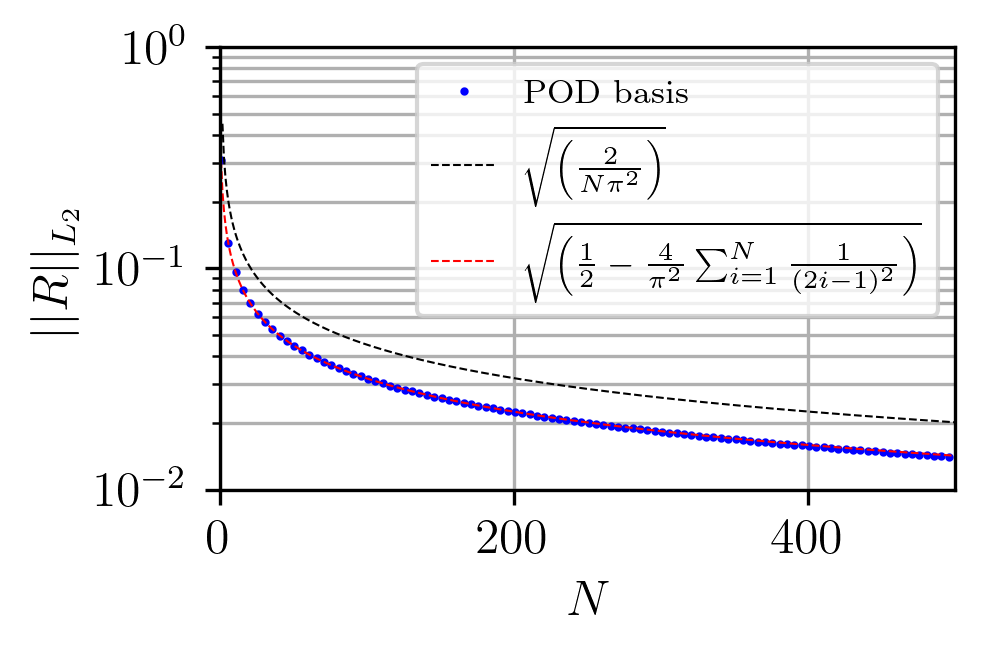

In [11]:
bv_name = "svd"
ic_name = "heaviside"
err = rmse[bv_name][ic_name]

i = np.arange(1, 501)
estimate1 = (2 / (n * np.pi**2))**.5
estimate2 = (1/2 - 4/np.pi**2 * np.cumsum(1/(2*i - 1)**2)) **.5
lbl1 = r'$\sqrt {\left( \frac{2}{N \pi^2} \right)}$'
lbl2 =  r'$\sqrt {\left( \frac{1}{2} - \frac{4}{\pi^2} \sum_{i=1}^N  \frac{1}{(2i-1)^2 } \right)}$'
#lbl2 = r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty \frac{-e^{i\pi}}{2^n}$!'
fig, ax = plt.subplots()
ax.plot(i-1, err, "b.", ms=2, label="POD basis")
ax.plot(i, estimate1, "k--", label=lbl1, lw=.5)
ax.plot(i, estimate2, "r--", label=lbl2, lw=.5)
plt.legend(prop={'size': 8})
ax.set_yscale('log')
plt.ylim([1e-2, 1])
plt.xlim([0, 500])
plt.xlabel(r'$N$')
plt.ylabel(r'$|| R ||_{L_2}$')
plt.grid(which="both")

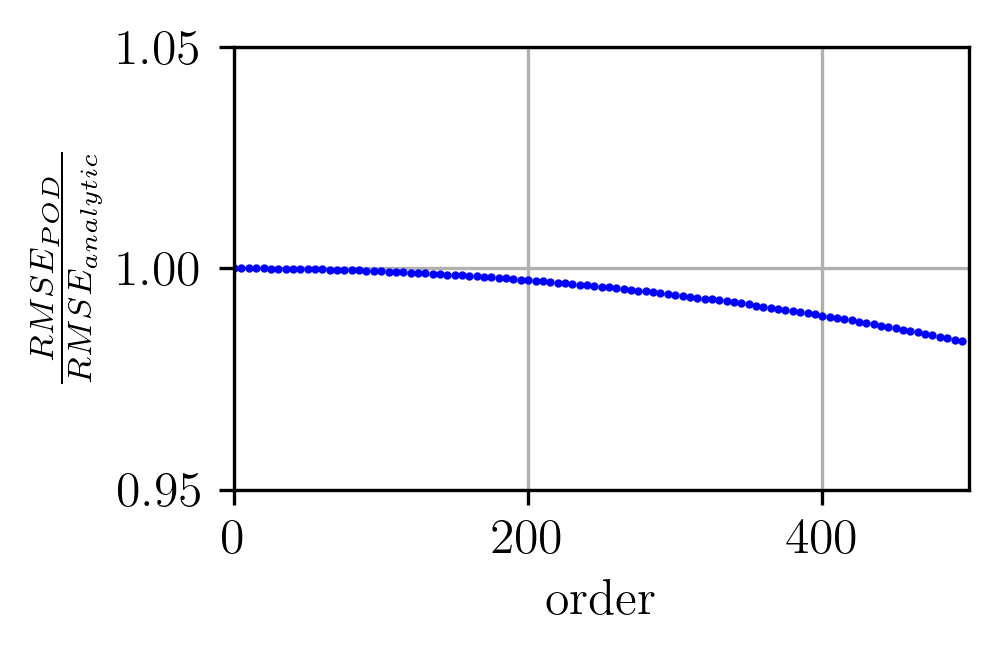

In [12]:
fig, ax = plt.subplots()
#ax.plot(err/estimate2, "r.", lw=.5)
#ax.plot(delta_n/estimate2, "r.", lw=.5, ms=2)
ax.plot(err[1:]/estimate2[:-1], "b.", lw=.5, ms=2)
#ax.plot(_dn/50/estimate2, "g.", lw=.5, ms=2)
#ax.plot(err[2:]/estimate2[:-2], "g.", lw=.5)
#plt.legend(prop={'size': 8})
#ax.set_yscale('log')
plt.ylim([0.95, 1.05])
plt.xlim([0, 500])
plt.xlabel("order")
plt.ylabel(r'$\frac{RMSE_{POD} }{RMSE_{analytic}} $')
plt.grid(which="both")

<ipython-input-13-fbd570157bf1>:7: RuntimeWarning: divide by zero encountered in true_divide
  estimate1 = 1 / (2 * n**0.5)
<ipython-input-13-fbd570157bf1>:8: RuntimeWarning: divide by zero encountered in true_divide
  estimate2 = 1 / (4 * n**0.5)


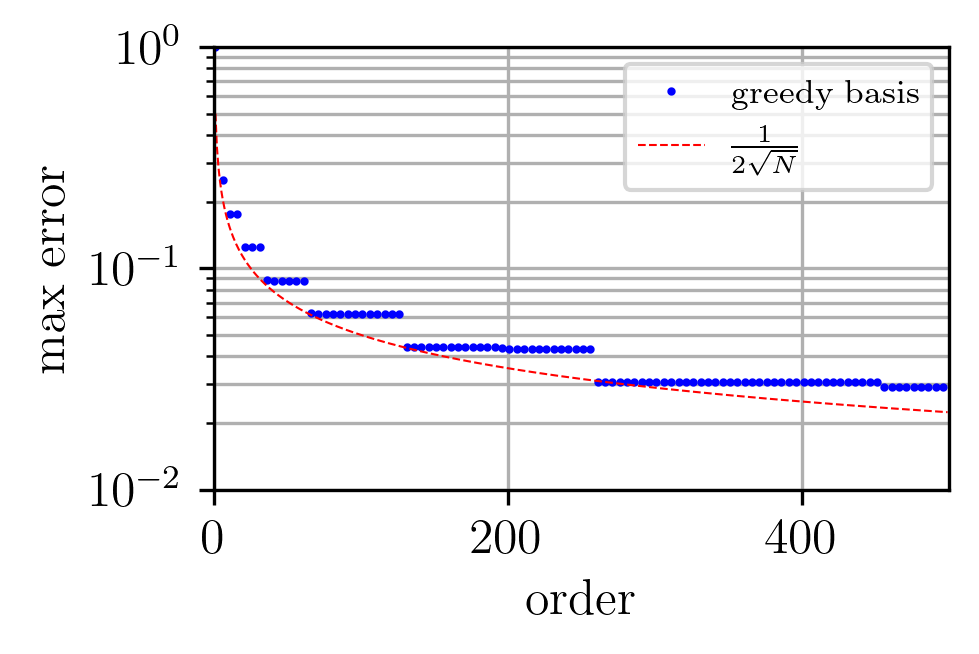

In [13]:
bv_name = "svd"
bv_name = "local neighbours average"
bv_name = "greedy"
ic_name = "heaviside"
err = maxe[bv_name][ic_name]
#err = err[err!=0]
estimate1 = 1 / (2 * n**0.5)
estimate2 = 1 / (4 * n**0.5)
lbl1 = r'$\frac{1}{2 \sqrt {N}} $'
lbl2 = r'$\frac{1}{4 \sqrt {N}} $'
fig, ax = plt.subplots()
ax.plot(err, "b.", ms=2, label="greedy basis")
ax.plot(estimate1, "r--", label=lbl1, lw=.5)
#ax.plot(estimate2, "g--", label=lbl2)

plt.legend(prop={'size': 8})
ax.set_yscale('log')
plt.ylim([1e-2, 1])
plt.xlim([0, 500])
plt.xlabel("order")
plt.ylabel("max error")
plt.grid(which="both")

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


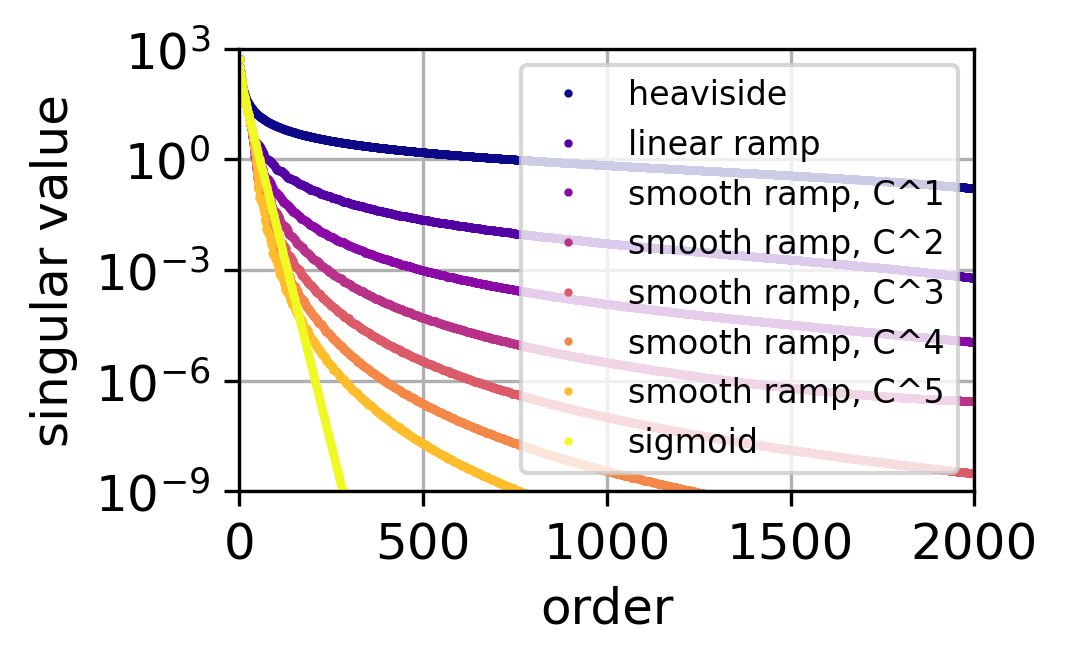

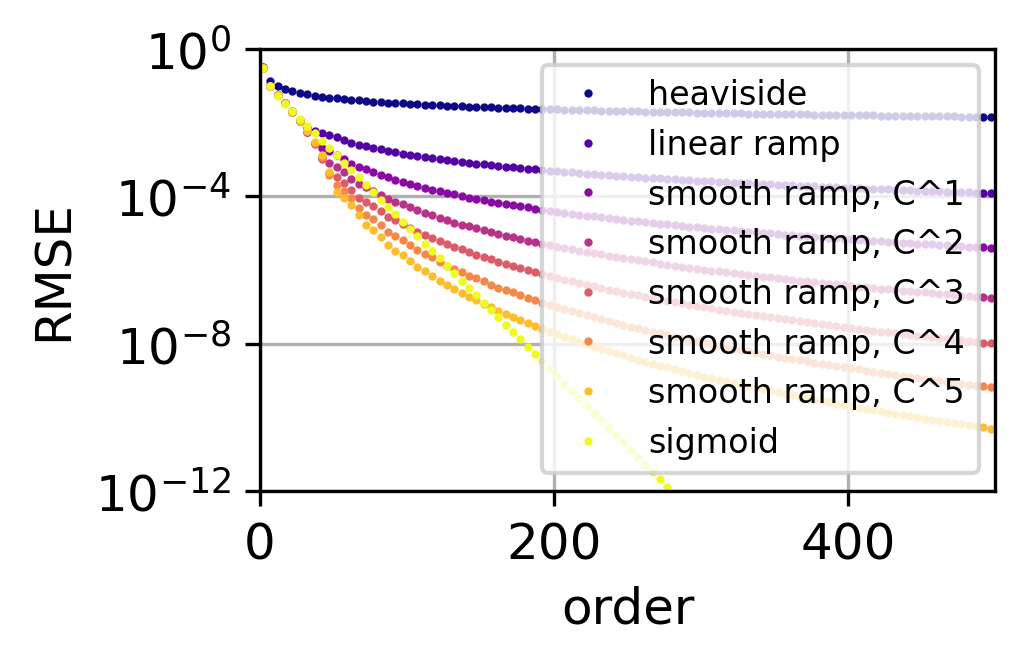

In [14]:
plt.rcParams['text.usetex'] = False
bv_name = "svd"
n = np.arange(1, 2501)
fig, ax = plt.subplots()
for i, ic_name in enumerate(["heaviside", "linear ramp", "smooth ramp, C^1", "smooth ramp, C^2", "smooth ramp, C^3", "smooth ramp, C^4", "smooth ramp, C^5", "sigmoid"]):
    S = SVs[ic_name].copy()
    plt.plot(n, S, "o", ms=1, color=cmap(i/7), label=ic_name)

plt.legend(prop={'size': 8})
ax.set_yscale('log')
plt.ylim([1e-9, 1e3])
plt.xlim([0, 2000])
plt.xlabel("order")
plt.ylabel("singular value")
plt.grid(which="both")
plt.show()


plt.rcParams['text.usetex'] = False
bv_name = "svd"
n = np.arange(1, 501)
fig, ax = plt.subplots()
for i, ic_name in enumerate(["heaviside", "linear ramp", "smooth ramp, C^1", "smooth ramp, C^2", "smooth ramp, C^3", "smooth ramp, C^4", "smooth ramp, C^5", "sigmoid"]):
    r = rmse["svd"][ic_name].copy()
    l = r != 0
    plt.plot(n[l], r[l], "o", ms=1, color=cmap(i/7), label=ic_name)

plt.legend(prop={'size': 8})
ax.set_yscale('log')
plt.ylim([1e-12, 1])
plt.xlim([0, 500])
plt.xlabel("order")
plt.ylabel("RMSE")  # L2-norm of the error
plt.grid(which="both")
plt.show()

1/n**(k+1) is a pretty good model for the decay of the singular values if we look at the singular values 50 to 2000

S(n) = 708.25 /n** 1.00  708.2490450991406 heaviside
0.5
0.45 0.3163364841279233
e(n) = 0.32 /n** 0.50  0.3163364841279233 heaviside
S(n) = 5349.74 /n** 2.00  73.14189592128169 linear ramp
1.5
0.45 1.3483196579877528
e(n) = 1.35 /n** 1.50  1.161171674640642 linear ramp
S(n) = 119755.20 /n** 3.00  49.29067862963495 smooth ramp, C^1
2.5
0.45 21.74742364562098
e(n) = 21.75 /n** 2.50  2.7912748654282358 smooth ramp, C^1
S(n) = 3176620.83 /n** 4.00  42.21738655085609 smooth ramp, C^2
3.5
0.45 488.881577662298
e(n) = 488.88 /n** 3.50  4.7021980608809475 smooth ramp, C^2
S(n) = 103302040.48 /n** 5.00  40.070224902666524 smooth ramp, C^3
4.5
0.45 14011.015746743236
e(n) = 14011.02 /n** 4.50  6.74984693040979 smooth ramp, C^3
S(n) = 3644463453.63 /n** 6.00  39.22885207895134 smooth ramp, C^4
5.5
0.45 457911.91931001726
e(n) = 457911.92 /n** 5.50  8.779376177996172 smooth ramp, C^4
S(n) = 149974074507.41 /n** 7.00  39.49787595103184 smooth ramp, C^5
6.5
0.45 17024726.48036813
e(n) = 17024726.48 

<ipython-input-15-12189ec794ea>:37: RuntimeWarning: divide by zero encountered in log10
  L2_error_log = np.log10(r)
<ipython-input-15-12189ec794ea>:37: RuntimeWarning: divide by zero encountered in log10
  L2_error_log = np.log10(r)
<ipython-input-15-12189ec794ea>:37: RuntimeWarning: divide by zero encountered in log10
  L2_error_log = np.log10(r)
<ipython-input-15-12189ec794ea>:37: RuntimeWarning: divide by zero encountered in log10
  L2_error_log = np.log10(r)
<ipython-input-15-12189ec794ea>:37: RuntimeWarning: divide by zero encountered in log10
  L2_error_log = np.log10(r)
<ipython-input-15-12189ec794ea>:37: RuntimeWarning: divide by zero encountered in log10
  L2_error_log = np.log10(r)
<ipython-input-15-12189ec794ea>:37: RuntimeWarning: divide by zero encountered in log10
  L2_error_log = np.log10(r)


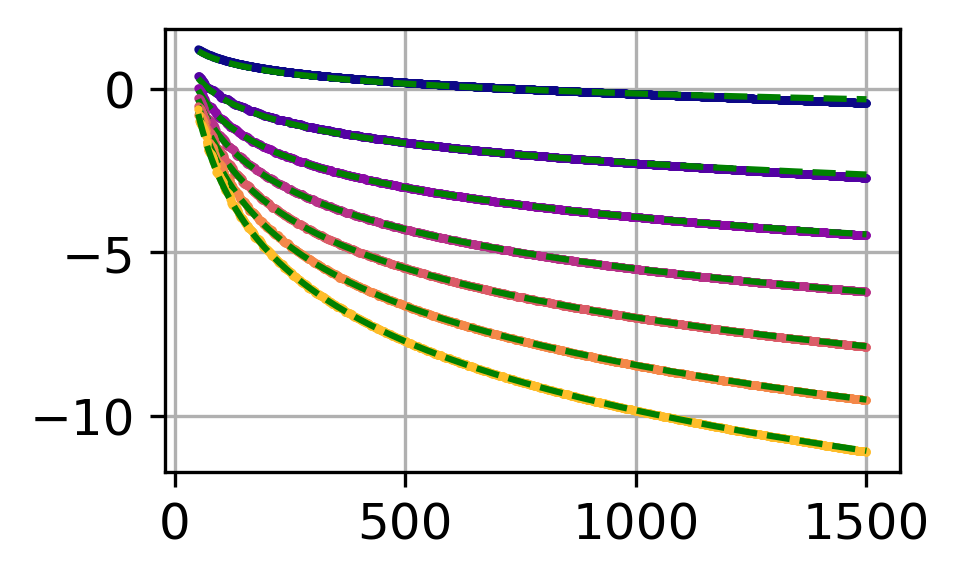

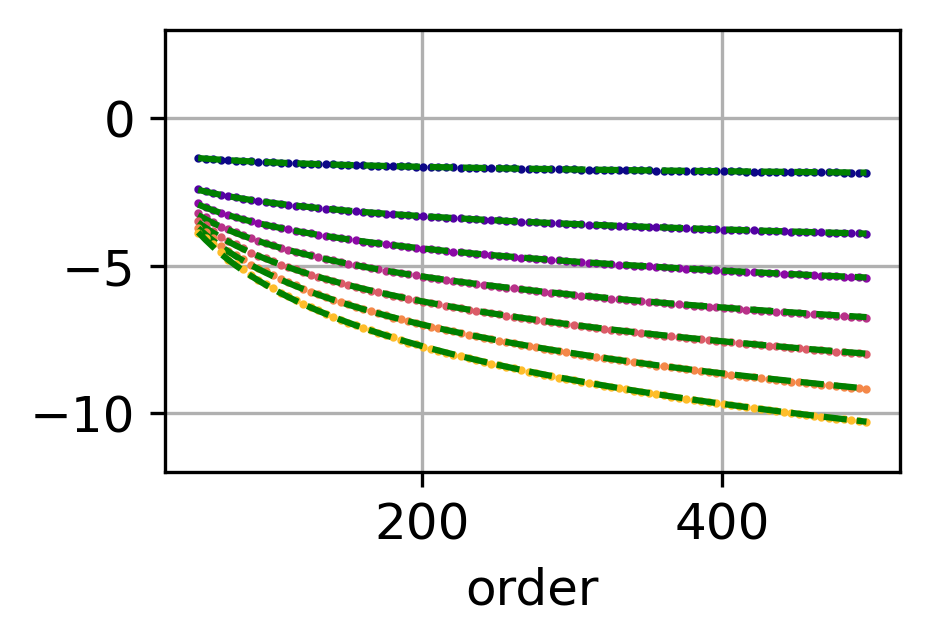

In [15]:
from scipy.optimize import curve_fit

def func(x, a):
    if a <= 0:
        return np.nan
    return np.log10(a/x**p)

def func2(x, a, p):
    if a <= 0:
        return np.nan
    return np.log10(a/x**p)

xdata = np.arange(51, 1501, dtype=np.float64)
# singular values fit
fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()
for i, ic_name in enumerate(["heaviside", "linear ramp", "smooth ramp, C^1", "smooth ramp, C^2",
                             "smooth ramp, C^3", "smooth ramp, C^4", "smooth ramp, C^5"]):
    S = SVs[ic_name].copy()
    S_n_log = np.log10(S[50:1500])
    p = i+1
    popt, pcov = curve_fit(func, xdata, S_n_log, [40**(i+1)])
    c = popt[0]
    print("S(n) = {:.2f} /n** {:.2f} ".format(c, p), popt[0]**(1/(i+1)), ic_name)
    
    ax1.plot(xdata, S_n_log, "o", ms=1, color=cmap(i/7), label=ic_name)
    ax1.plot(xdata, func(xdata, *popt), 'g--')

    # L2 error fit
    #n = np.arange(0, 1500, dtype=np.float64)
    #r = np.cumsum(S[::-1])[::-1]
    #rmax = r[50]
    #print(rmax)
    #r /= rmax
    n = np.arange(0, 500, dtype=np.float64)
    r = delta_n[bv_name][ic_name]
    L2_error_log = np.log10(r)
    ll = np.isfinite(L2_error_log)
    
    #print(n[ll])
    #print(L2_error_log[ll])
    n = n[ll][10:]
    L2_error_log = L2_error_log[ll][10:]
    ax2.plot(n, L2_error_log, ".", ms=1, color=cmap(i/7), label=ic_name)
    #n = np.arange(51, 501, dtype=np.float64)
    #r = rmse["svd"][ic_name][50:]
    #l = r != 0.0
    #L2_error_log = np.log10(r[l])
    #n = n[l]
    p = i +.5
    print(p)
    popt, pcov = curve_fit(func, n, L2_error_log, [.45])
    c = popt[0]
    print(.45, c)
    print("e(n) = {:.2f} /n** {:.2f} ".format(c, p), popt[0]**(1/(i+1)), ic_name)
    
    ax2.plot(n, L2_error_log, "o", ms=1, color=cmap(i/7), label=ic_name)
    ax2.plot(n, func(n, *popt), 'g--')

#plt.legend(prop={'size': 8})
#ax.set_yscale('log')
#plt.ylim([1e-12, 1])
plt.ylim([-12, 3])
#plt.xlim([0, 500])
plt.xlabel("order")
#plt.ylabel("singular value")
ax1.grid(which="both")
ax2.grid(which="both")
plt.show()





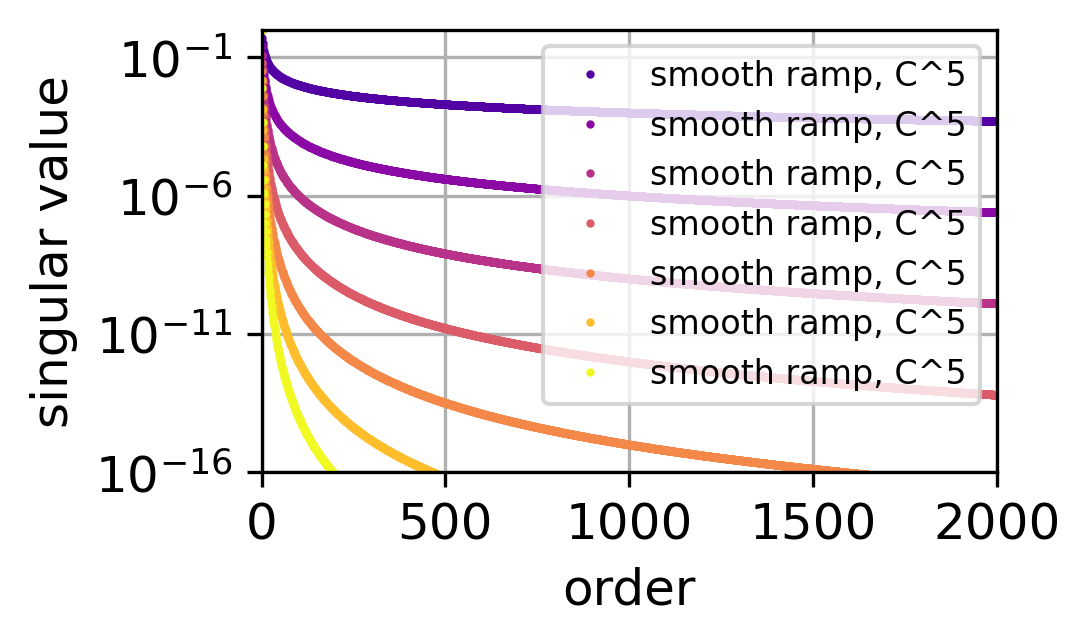

In [16]:
plt.rcParams['text.usetex'] = False
bv_name = "svd"
n = np.arange(1, 2501, dtype=np.float64)
fig, ax = plt.subplots()
for i in [1, 2, 3, 4, 5, 6, 7]:
    # 1/2, 7/2, 150/2
    S = 1/n**i
    plt.plot(n, S/S[0], "o", ms=1, color=cmap(i/7), label=ic_name)

plt.legend(prop={'size': 8})
ax.set_yscale('log')
plt.ylim([1e-16, 1])
plt.xlim([0, 2000])
plt.xlabel("order")
plt.ylabel("singular value")
plt.grid(which="both")
plt.show()

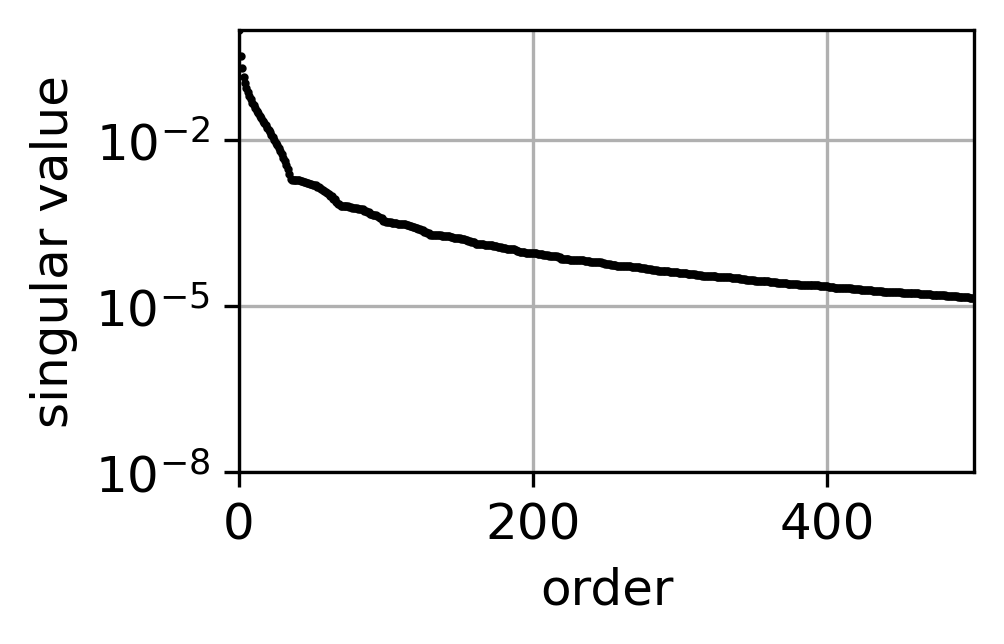

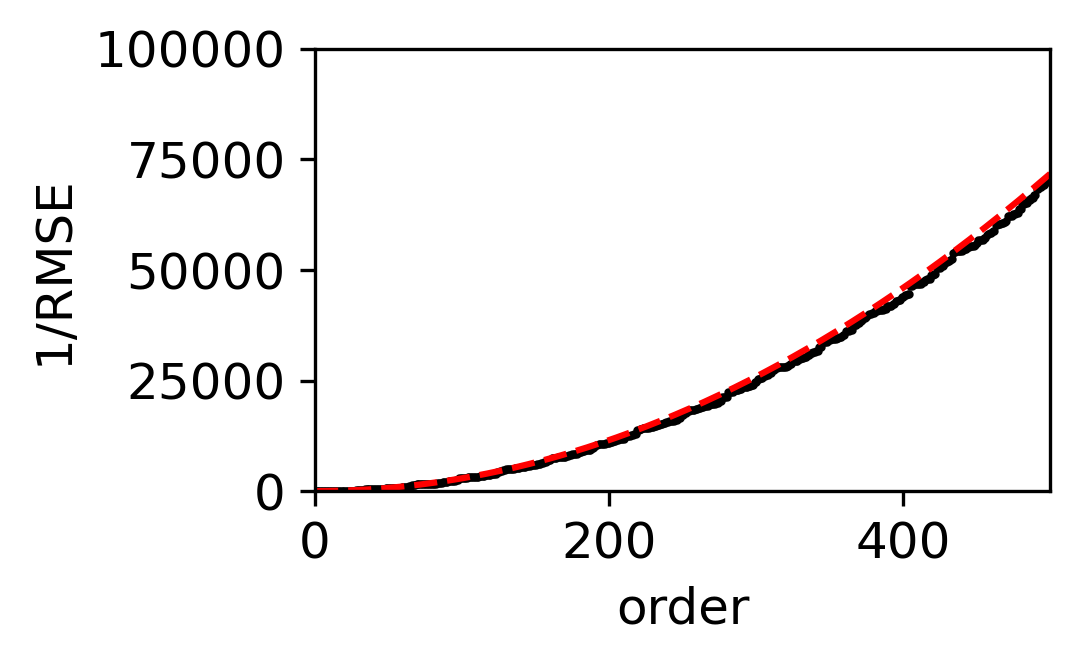

In [17]:
bv_name = "svd"
ic_name = "linear ramp"
err = rmse[bv_name][ic_name]
S = SVs[ic_name].copy()
estimate = 3.5/n**2
plot(S, estimate)
ax = plot2(S, estimate)
ax.set_ylim([0, 1e5])
plt.show()
#print(1/S)
#print(1/estimate)

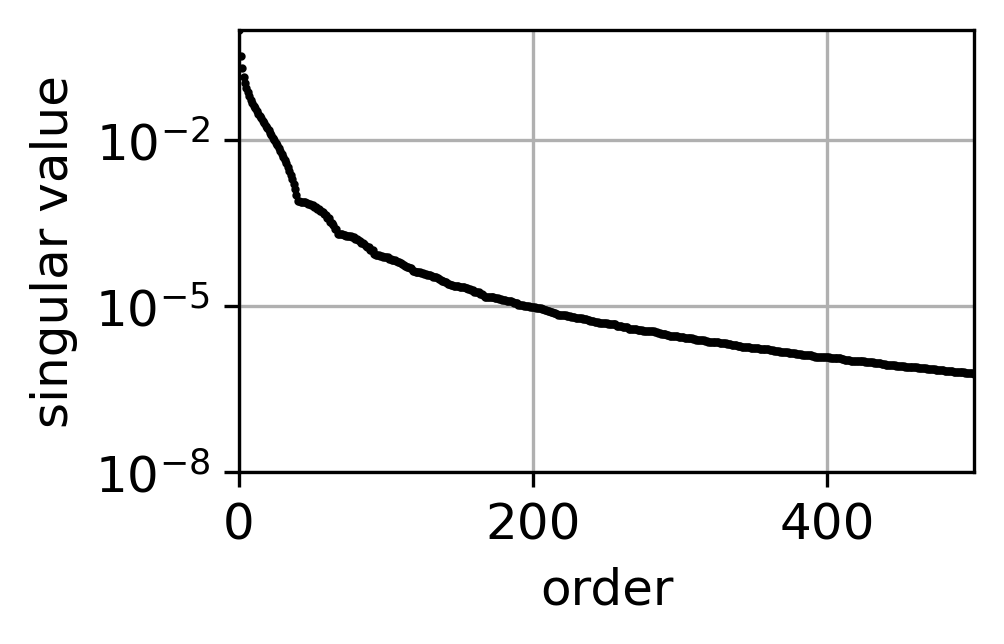

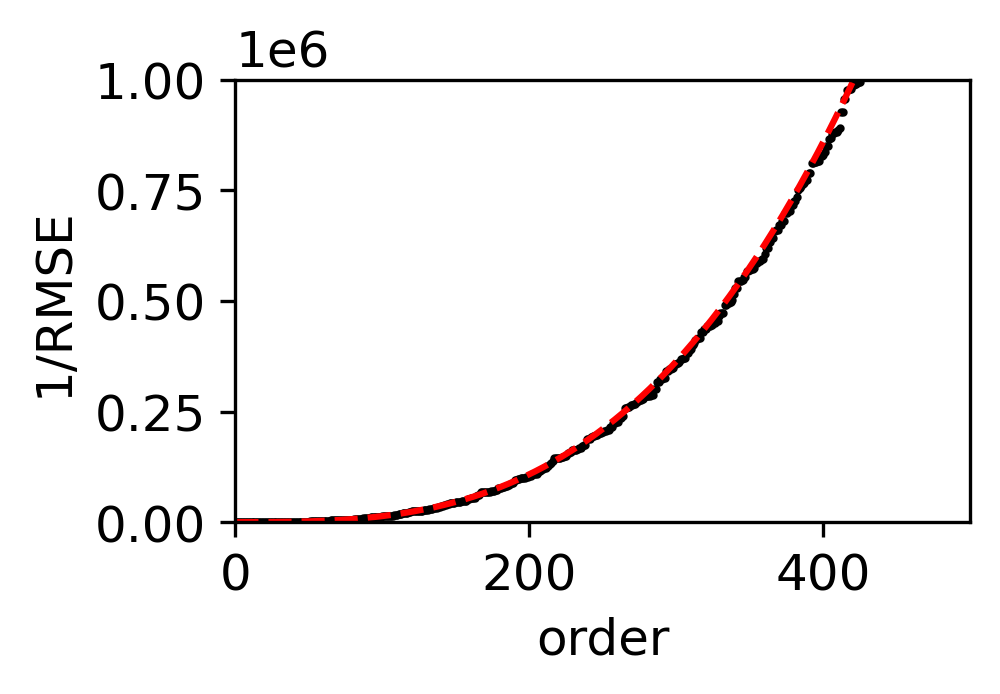

In [18]:
bv_name = "svd"
ic_name = "smooth ramp, C^1"
err = rmse[bv_name][ic_name]
S = SVs[ic_name].copy()
estimate = 75/n**3
#estimate = .5/n**2
ax = plot(S, estimate)
#ax.set_ylim([1e-8, 1])
plt.show()

ax = plot2(S, estimate)
ax.set_ylim([0, 1e6])
plt.show()

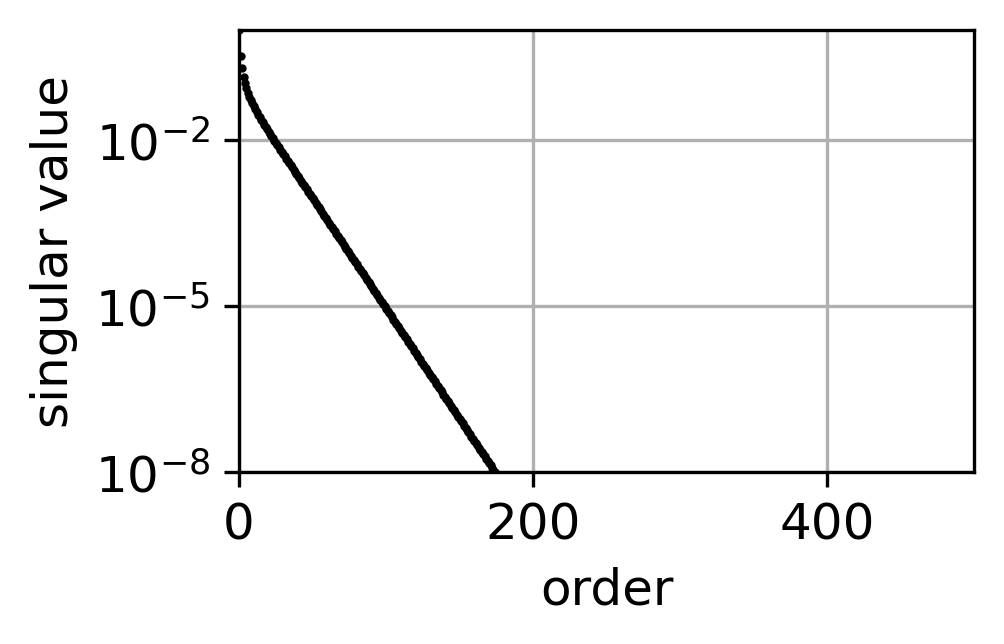

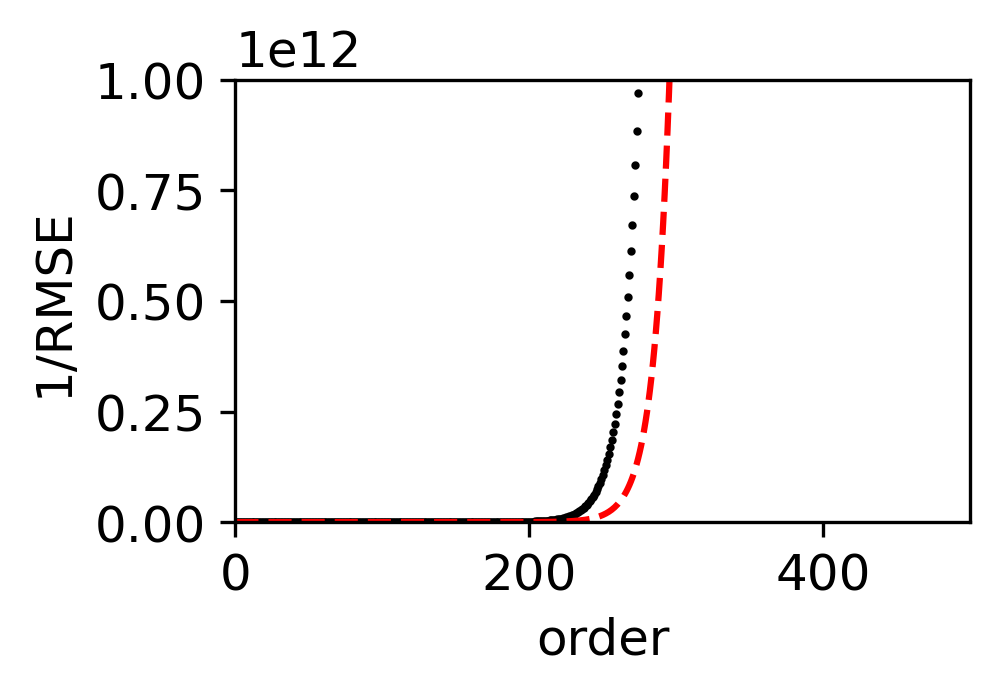

In [19]:
bv_name = "svd"
ic_name = "sigmoid"
err = rmse[bv_name][ic_name]
S = SVs[ic_name].copy()
estimate = .5/np.exp(n/11)
ax = plot(S, estimate)
#ax.set_ylim([1e-12, 1])
plt.show()

ax = plot2(S, estimate)
ax.set_ylim([1, 1e12])
plt.show()

In [20]:
from initial_conditions import Domain, Heaviside, LinearRamp, SmoothRamp, Sigmoid, CkRamp
from basis_functions import SVD, Trigonometric, Greedy, LNA, LPF

In [21]:
u_lr = CkRamp(0.025, 0)
u_lr.plot(x())
plt.show()
tt = np.linspace(0, 1, 10000)
for k in range(6):
    u_Ck = CkRamp(0.25, k)
    u_Ck.fit_to(u_lr, tt)
    print(u_Ck.eps)

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
x = Domain([0, 1], 2000)
tt = np.linspace(0, 1, 10000)

u_C0 = CkRamp(0.025, 0)
for k in range(-1, 5):
    print(k)
    if k == -1:
        u_Ck = Heaviside()
    elif k == 4:
        u_Ck = Sigmoid(a=50)
    else:
        u_Ck = CkRamp(0.025, k)
    u_Ck.fit_to(u_C0, tt)
    print(u_Ck.name)
    
    ax = u_Ck.plot(x(), color="k", ms=2)
    ax.set_ylabel(r'$u(x; \mu=0.5)$')
#                  "u(x; \mu={:.1f})".format(0.5))
    ax.set_xlim([0.4, 0.6])
    ax.set_xticks([0.4, 0.5, 0.6])
    ax.set_yticks([0.0, 0.5, 1.0])
    ax.set_ylim([0, 1])
    plt.show()
    
    #x = Domain([0, 1], 2000)
    #mu = Domain([0, 1], 1000)
    #X = u_Ck(x(), mu())
    #svd_basis = SVD(X)
#    u_Ck.S = svd_basis.S
    #np.save(results_path+"SV_"+u_Ck.name+".npy", svd_basis.S)
    
    
    S = np.load(results_path+"SV_"+u_Ck.name+".npy")
    ax = plot(S, estimate=1/n)
    ax.set_ylim([1e-6, 1])
    plt.show()